Задача 2

Внимательно изучить схему данных и загруженную базу из Задания1. Сформировать 1 или несколько классов по таблицам в базе данных. Подключиться к базе данных, загруженной в задаче 1 из python. При подключении рекомендуется использовать менеджер контекста.

In [17]:
from sqlalchemy import create_engine, text
import pandas as pd

user = 'root'
password = 'NoMorFort19#'
host = '127.0.0.1'
port = 3306
database = 'dvdrental'

def get_connection():
    return create_engine(
        url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(user, password, host, port, database))

def exec_query(query):
    try:
        engine = get_connection()
        print(f"Успешно подключено.")
        with engine.connect() as connection:
            df = pd.DataFrame(connection.execute(text(query)))
        return df
    except Exception as ex:
        print("Не получилось подключиться: \n", ex)

Пример класса для SqlAlchemy

In [18]:

from sqlalchemy import Column, Integer, VARCHAR, TIMESTAMP
from sqlalchemy.orm import sessionmaker, declarative_base

engine = get_connection()

Base = declarative_base()

class Country(Base):
    __tablename__ = 'country'
    country_id = Column(Integer, primary_key=True)
    country = Column(VARCHAR(50))
    last_update = Column(TIMESTAMP)

    def __repr__(self):
        return f"{self.country_id} {self.country} {self.last_update}"
    

Session = sessionmaker(bind=engine)
session = Session()

Countries = session.query(Country).all()
for contry in Countries:
    print(contry)



1 Afghanistan 2006-02-15 04:44:00
2 Algeria 2006-02-15 04:44:00
3 American Samoa 2006-02-15 04:44:00
4 Angola 2006-02-15 04:44:00
5 Anguilla 2006-02-15 04:44:00
6 Argentina 2006-02-15 04:44:00
7 Armenia 2006-02-15 04:44:00
8 Australia 2006-02-15 04:44:00
9 Austria 2006-02-15 04:44:00
10 Azerbaijan 2006-02-15 04:44:00
11 Bahrain 2006-02-15 04:44:00
12 Bangladesh 2006-02-15 04:44:00
13 Belarus 2006-02-15 04:44:00
14 Bolivia 2006-02-15 04:44:00
15 Brazil 2006-02-15 04:44:00
16 Brunei 2006-02-15 04:44:00
17 Bulgaria 2006-02-15 04:44:00
18 Cambodia 2006-02-15 04:44:00
19 Cameroon 2006-02-15 04:44:00
20 Canada 2006-02-15 04:44:00
21 Chad 2006-02-15 04:44:00
22 Chile 2006-02-15 04:44:00
23 China 2006-02-15 04:44:00
24 Colombia 2006-02-15 04:44:00
25 Congo, The Democratic Republic of the 2006-02-15 04:44:00
26 Czech Republic 2006-02-15 04:44:00
27 Dominican Republic 2006-02-15 04:44:00
28 Ecuador 2006-02-15 04:44:00
29 Egypt 2006-02-15 04:44:00
30 Estonia 2006-02-15 04:44:00
31 Ethiopia 2006-0

Далее без класса


1. Какова доля фильмов в каждой рейтинговой категории (G,PG,PG-13,R и т.д.) в нашем ассортименте? 

In [19]:
query = """
    SELECT film.rating as Rating, COUNT(film.film_id) * 100.0 / sum(COUNT(film.film_id)) over() AS Percent
    FROM film
    GROUP BY Rating
    ORDER BY Percent DESC
    """
film_rating_percent = exec_query(query)
print(film_rating_percent)
film_rating_percent.to_csv('film_rating_percent.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
  Rating   Percent
0  PG-13  22.30000
1  NC-17  21.00000
2      R  19.50000
3     PG  19.40000
4      G  17.80000


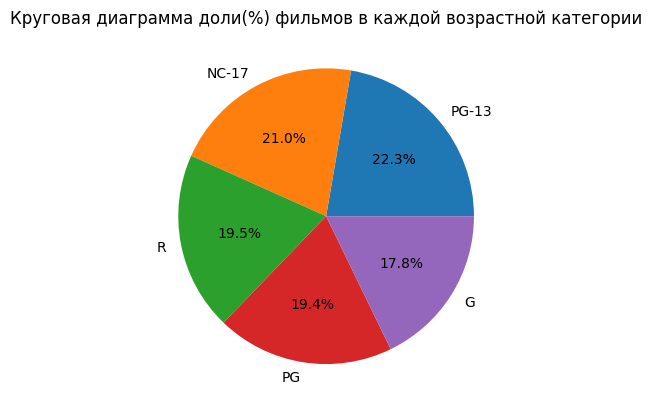

In [20]:
import matplotlib.pyplot as plt

plt.pie(film_rating_percent['Percent'], labels=film_rating_percent['Rating'], autopct='%1.1f%%')
plt.title("Круговая диаграмма доли(%) фильмов в каждой возрастной категории")
plt.show()

2. Какие категории фильмов чаще всего арендуются клиентами?

In [21]:
query = """
    SELECT category.name as Category, COUNT(*) AS Count
    FROM rental
    INNER JOIN inventory ON inventory.inventory_id = rental.inventory_id
    INNER JOIN film_category ON film_category.film_id = inventory.film_id
    INNER JOIN category ON category.category_id = film_category.category_id
    group by Category
    order by Count DESC
    """
category_popularity = exec_query(query)
print(category_popularity)
category_popularity.to_csv('category_popularity.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
       Category  Count
0        Sports   1179
1     Animation   1166
2        Action   1112
3        Sci-Fi   1101
4        Family   1096
5         Drama   1060
6   Documentary   1050
7       Foreign   1033
8         Games    969
9      Children    945
10       Comedy    941
11          New    940
12     Classics    939
13       Horror    846
14       Travel    837
15        Music    830


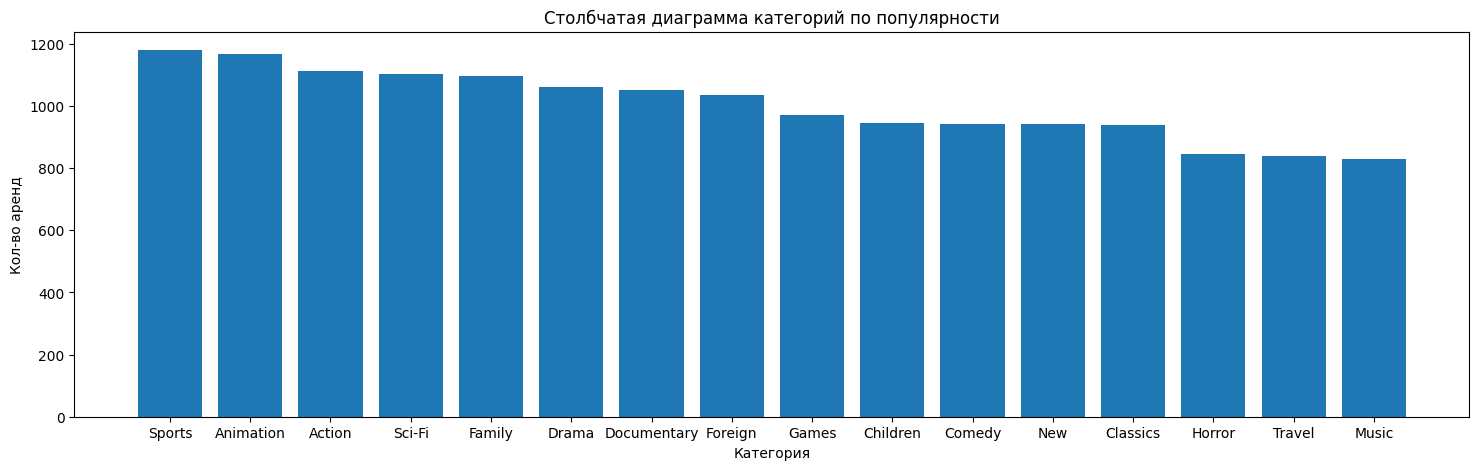

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.bar(category_popularity['Category'], category_popularity['Count'])
plt.title("Столбчатая диаграмма категорий по популярности")
plt.xlabel('Категория')
plt.ylabel('Кол-во аренд')
plt.show()

3. Какова средняя продолжительность проката(rental duration) для каждой категории фильмов?

In [23]:
query = """
    SELECT category.name as Category, AVG(film.rental_duration) as average_duration
    FROM film
    INNER JOIN film_category ON film.film_id = film_category.film_id
    INNER JOIN category ON category.category_id = film_category.category_id
    group by Category
    order by average_duration desc
    """
average_duration = exec_query(query)
print(average_duration)
average_duration.to_csv('average_duration.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
       Category average_duration
0        Travel           5.3509
1         Music           5.2353
2        Family           5.1739
3       Foreign           5.1096
4         Drama           5.0806
5      Classics           5.0702
6         Games           5.0656
7      Children           5.0333
8        Action           4.9531
9        Comedy           4.9310
10    Animation           4.8939
11       Sci-Fi           4.8852
12       Horror           4.8571
13  Documentary           4.7647
14          New           4.7460
15       Sports           4.7162


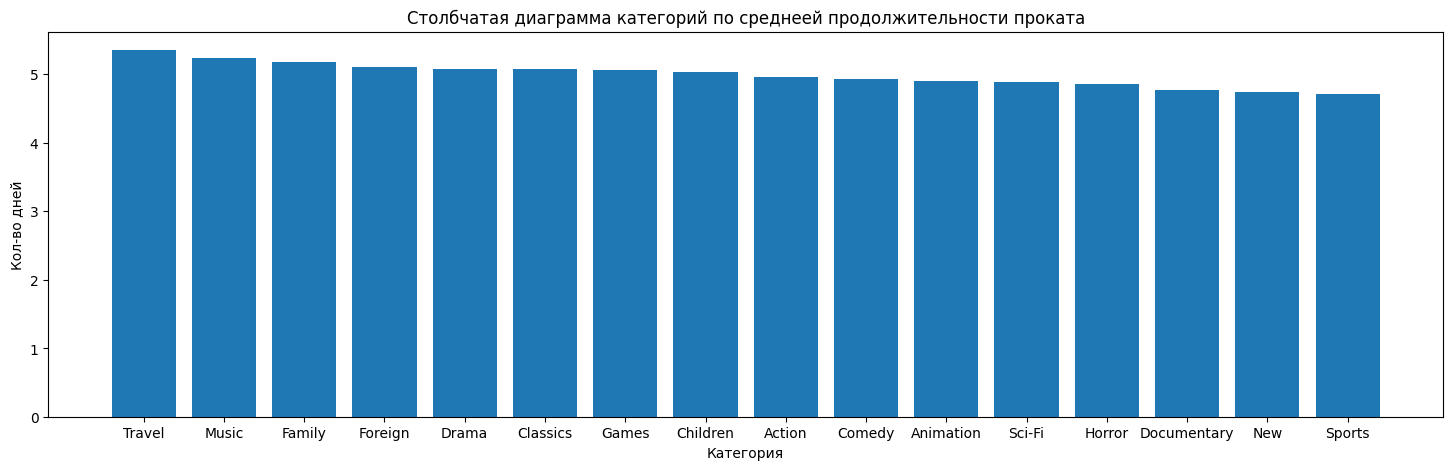

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.bar(average_duration['Category'], average_duration['average_duration'])
plt.title("Столбчатая диаграмма категорий по среднеей продолжительности проката")
plt.xlabel('Категория')
plt.ylabel('Кол-во дней')
plt.show()

4. Каковы тенденции в ежемесячном доходе от проката(monthly rental revenue) и продажах (sales) за прошедший год?

In [25]:

query = """
    SELECT  
    monthname(payment.payment_date) AS Month , SUM(payment.amount) AS rental_revenue, count(payment.payment_id) AS Sales
    FROM payment
    where year(payment.payment_date) = 2005
    GROUP BY Month
    ORDER BY Month DESC
    """
trends_in_monthly_income = exec_query(query)
print(trends_in_monthly_income)
trends_in_monthly_income.to_csv('trends_in_monthly_income.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
    Month rental_revenue  Sales
0     May        4823.44   1156
1    June        9629.89   2311
2    July       28368.91   6709
3  August       24070.14   5686


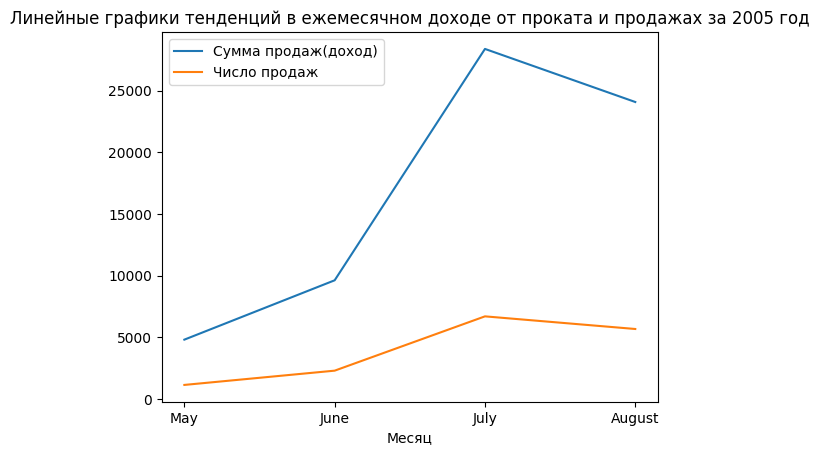

In [26]:
import matplotlib.pyplot as plt

plt.plot(trends_in_monthly_income['Month'], trends_in_monthly_income['rental_revenue'], label="Сумма продаж(доход)")
plt.plot(trends_in_monthly_income['Month'], trends_in_monthly_income['Sales'], label="Число продаж")
plt.title("Линейные графики тенденций в ежемесячном доходе от проката и продажах за 2005 год")
plt.xlabel('Месяц')
plt.legend()
plt.show()

5. Как соотносятся показатели продаж в разных магазинах?

In [27]:
query = """
    SELECT  
    inventory.store_id ,SUM(payment.amount) AS revenue, count(rental.rental_id) as sum_sold_dvd
    FROM payment
    join rental on rental.rental_id = payment.rental_id 
    join inventory on inventory.inventory_id = rental.inventory_id
    group by store_id
    """
sales_by_stores = exec_query(query)
print(sales_by_stores)
sales_by_stores.to_csv('sales_by_stores.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
   store_id   revenue  sum_sold_dvd
0         1  33679.79          7923
1         2  33726.77          8121


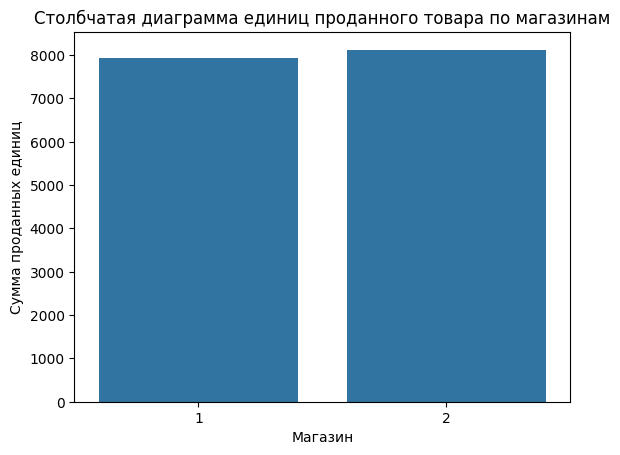

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='store_id', y='sum_sold_dvd', data = sales_by_stores)
plt.title("Столбчатая диаграмма единиц проданного товара по магазинам")
plt.xlabel('Магазин')
plt.ylabel('Сумма проданных единиц')
plt.show()

6. Каковы средние затраты на замену(replacement_cost) фильмов в разных жанрах?

In [29]:
query = """
    SELECT category.name as Category, AVG(film.replacement_cost) as average_replacement_cost
    FROM film
    INNER JOIN film_category ON film.film_id = film_category.film_id
    INNER JOIN category ON category.category_id = film_category.category_id
    group by Category
    order by average_replacement_cost desc
    """
average_replacement_cost = exec_query(query)
print(average_replacement_cost)
average_replacement_cost.to_csv('average_replacement_cost.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
       Category average_replacement_cost
0        Sci-Fi                21.153934
1         Drama                21.086774
2      Classics                21.007544
3        Action                20.911875
4        Sports                20.395405
5         Games                20.285082
6     Animation                20.126364
7      Children                20.056667
8        Horror                19.865000
9        Family                19.729130
10  Documentary                19.622353
11        Music                19.440980
12          New                19.418571
13       Travel                19.025088
14       Comedy                19.024483
15      Foreign                18.647534


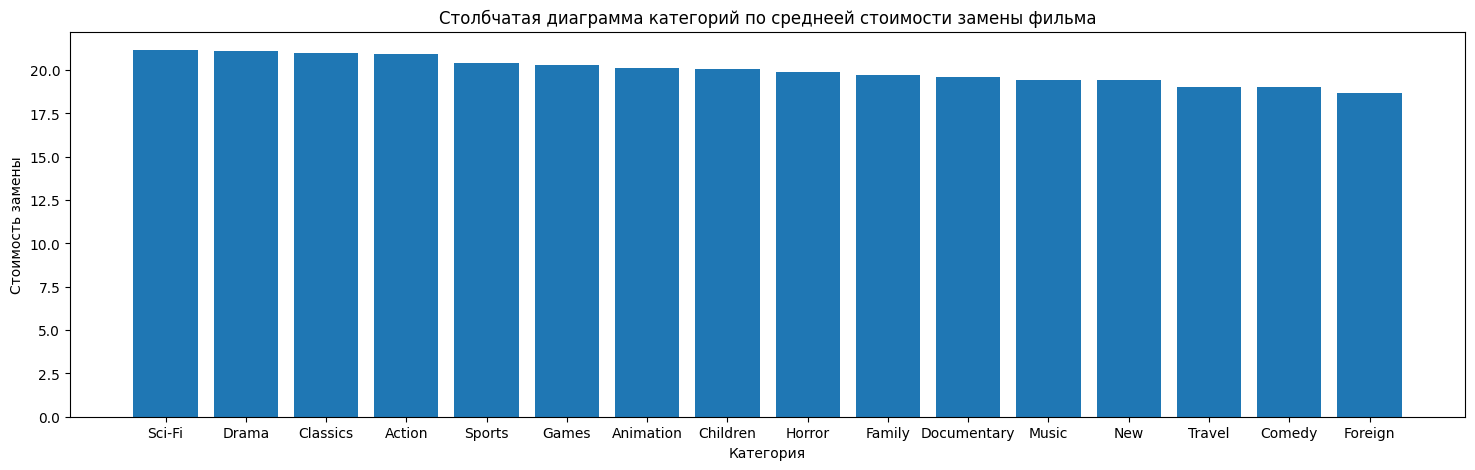

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
plt.bar(average_replacement_cost['Category'], average_replacement_cost['average_replacement_cost'])
plt.title("Столбчатая диаграмма категорий по среднеей стоимости замены фильма")
plt.xlabel('Категория')
plt.ylabel('Стоимость замены')
plt.show()

7. Какие актеры снимаются в самых разных жанрах фильмов?

In [31]:
query = """
    SELECT
    CONCAT_WS(' ',actor.first_name, actor.last_name) as actor_name ,
    COUNT(distinct film_category.category_id) AS Number_of_categories
    from film
    join film_actor on film.film_id = film_actor.film_id
    join actor on actor.actor_id = film_actor.actor_id  
    join film_category on film_category.film_id = film.film_id
    group by actor_name
    order by Number_of_categories desc
    """
actors_by_category = exec_query(query)
print(actors_by_category)
actors_by_category.to_csv('actors_by_category.csv', sep=',', index=False, encoding='utf-8')

Успешно подключено.
         actor_name  Number_of_categories
0    DARYL WAHLBERG                    16
1      EWAN GOODING                    16
2    GINA DEGENERES                    16
3     GROUCHO DUNST                    16
4       HARVEY HOPE                    16
..              ...                   ...
194    THORA TEMPLE                    10
195       EMILY DEE                     9
196   KENNETH PESCI                     9
197       JUDY DEAN                     8
198   JULIA FAWCETT                     8

[199 rows x 2 columns]


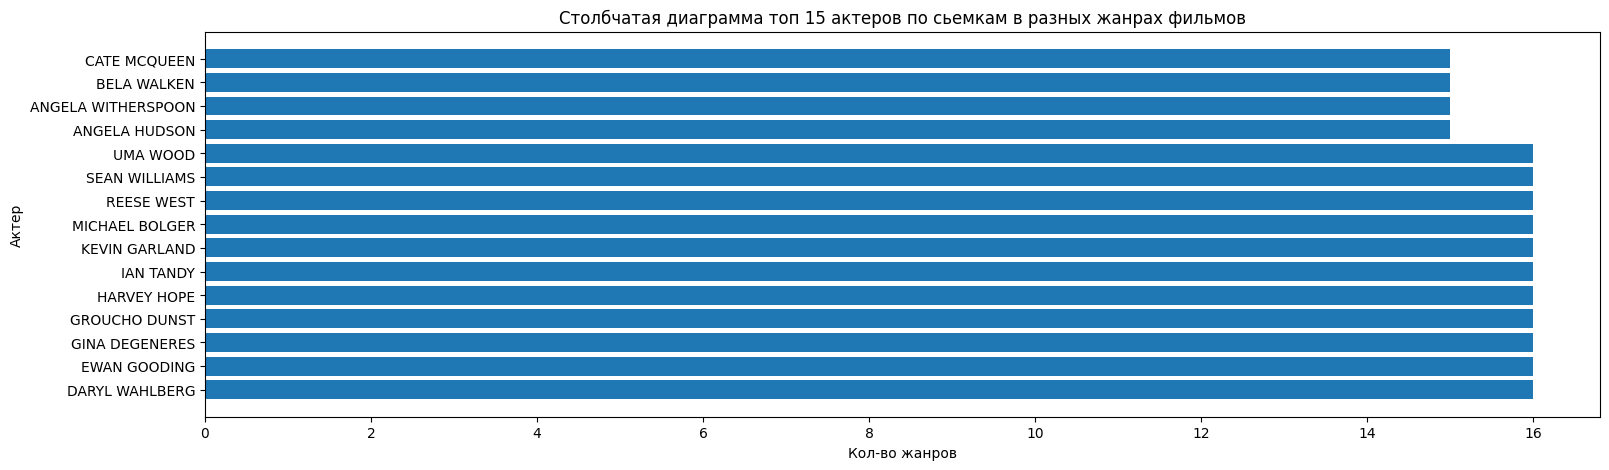

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
top15_actors_by_category = actors_by_category.head(15)
plt.barh(top15_actors_by_category['actor_name'], top15_actors_by_category['Number_of_categories'])
plt.title("Столбчатая диаграмма топ 15 актеров по сьемкам в разных жанрах фильмов")
plt.xlabel('Кол-во жанров')
plt.ylabel('Актер')
plt.show()